90experiments\setup3\3_memoryGame_2024-06-18_09h31.36.574.csv
90experiments\setup4\4_memoryGame_2024-07-04_12h23.45.076.csv
90experiments\setup6\6_memoryGame_2024-06-17_10h28.44.651.csv
90experiments\setup7\7_memoryGame_2024-05-23_14h43.26.511.csv
90experiments\setup8\8_memoryGame_2024-05-23_15h02.38.691.csv
90experiments\setup9\9_memoryGame_2024-06-18_09h45.05.658.csv
90experiments\setup10\10_memoryGame_2024-05-23_15h25.24.035.csv
90experiments\setup11\11_memoryGame_2024-05-24_10h02.38.363.csv
90experiments\setup12\12_memoryGame_2024-06-18_11h49.24.838.csv
90experiments\setup13\13_memoryGame_2024-05-23_15h39.34.447.csv
90experiments\setup14\14_memoryGame_2024-05-23_15h54.34.900.csv
90experiments\setup15\15_memoryGame_2024-06-19_12h32.43.276.csv
90experiments\setup16\16_memoryGame_2024-05-24_09h21.46.845.csv
90experiments\setup17\17_memoryGame_2024-05-24_09h40.51.068.csv
90experiments\setup18\18_memoryGame_2024-06-13_14h57.39.895.csv
90experiments\setup19\19_memoryGame_2024-05-24_10h24

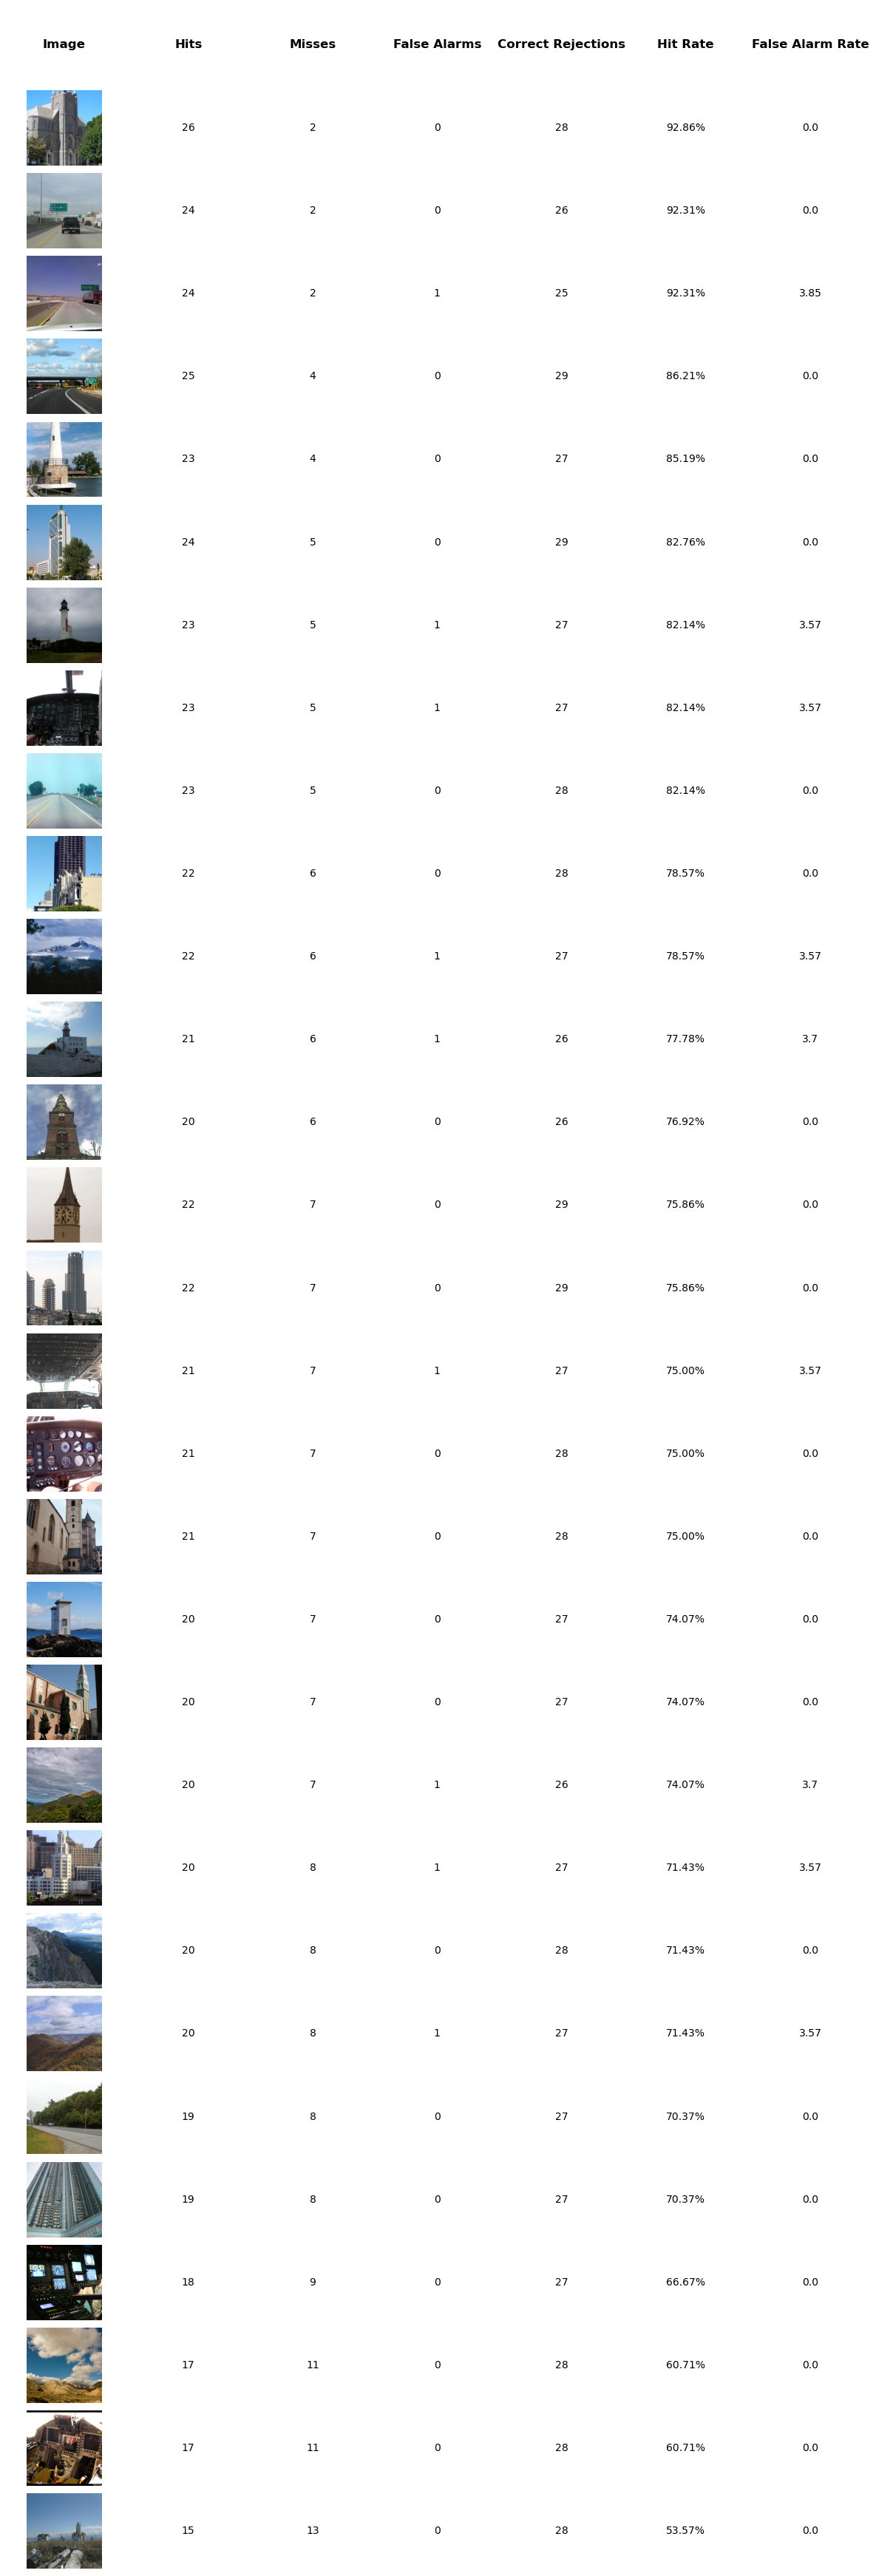

In [97]:
#create hit statistics inside "hit_rate_scores.csv" file

import os
import csv
import numpy as np
import matplotlib.pyplot as plt

# Create a dictionary to store hit, miss, false alarm, correct rejection,
# hit rate, and false alarm rate counts for each image
image_stats = {}

# Populate the dictionary with image names and initial counts
target_images_folder = "targetImages"
for filename in os.listdir(target_images_folder):
    if filename.endswith(".jpg"):
        image_path = os.path.join(target_images_folder, filename)
        image_stats[image_path] = {"hits": 0, "misses": 0, "false_alarm_count": 0, "correct_rejection_count": 0,
                                    "hit_rate": 0, "false_alarm_rate": 0}
unique_image_paths = {}
# Iterate over the experiment folders
for setup_folder in range(1, 91):
    setup_folder_path = os.path.join("90experiments", f"setup{setup_folder}")

    # Find the CSV file in the setup folder

    try:
        csv_file = [f for f in os.listdir(setup_folder_path) if f.endswith(".csv") and f != "setup.csv"][0]
    except IndexError:
        continue
    csv_file_path = os.path.join(setup_folder_path, csv_file)
    

    if(setup_folder == 1 or setup_folder == 2 or setup_folder == 49 or setup_folder == 50 or setup_folder == 5):
        continue
    print(csv_file_path)

    # Process the CSV file
    with open(csv_file_path, 'r') as csvfile:
        csv_reader = csv.DictReader(csvfile)
        for row in csv_reader:
            image_path = row["imagePath"]
            if image_path and image_path in image_stats and row["key_resp_3.keys"]:  # Check if imagePath is not null and inside the dictionary
                if(image_path in unique_image_paths):
                    unique_image_paths[image_path] += 1
                else:
                    unique_image_paths[image_path] = 1
                if row["oldNew"] == "old":
                    if row["key_resp_3.keys"] == "space":
                        image_stats[image_path]["hits"] += 1
                    elif row["key_resp_3.keys"]:
                        image_stats[image_path]["misses"] += 1
                elif row["oldNew"] == "new":
                    if row["key_resp_3.keys"] == "space":
                        image_stats[image_path]["false_alarm_count"] += 1
                    elif row["key_resp_3.keys"]:
                        image_stats[image_path]["correct_rejection_count"] += 1
    #print("trenutni fajlovi", unique_image_paths)
    #print(len(unique_image_paths))

# Calculate hit rate, false alarm rate, and false alarm rate for each image
for image_path, stats in image_stats.items():
    hits_and_misses = stats["hits"] + stats["misses"]
    if hits_and_misses > 0:
        image_stats[image_path]["hit_rate"] = stats["hits"] / hits_and_misses * 100
    else:
        image_stats[image_path]["hit_rate"] = 0
    falseAlarms_and_correctRejections = stats["false_alarm_count"] + stats["correct_rejection_count"]
    if falseAlarms_and_correctRejections > 0:
        image_stats[image_path]["false_alarm_rate"] = stats["false_alarm_count"] / falseAlarms_and_correctRejections * 100
    else:
        image_stats[image_path]["false_alarm_rate"] = 0

# Print the hit rate, false alarm rate, and counts for each image
#for image_path, stats in image_stats.items():
    #print(f"Image: {image_path}, Hits: {stats['hits']}, Misses: {stats['misses']}, False Alarms: {stats['false_alarm_count']}, Correct Rejections: {stats['correct_rejection_count']}, Hit Rate: {stats['hit_rate']:.2f}%, False Alarm Rate: {stats['false_alarm_rate']:.2f}")

import csv

# Sort image_stats by hit rate
sorted_stats = sorted(image_stats.items(), key=lambda x: x[1]['hit_rate'], reverse=True)

hit_rates = [value['hit_rate'] for value in image_stats.values()]

# Calculate mean and standard deviation
mean_hit_rate = np.mean(hit_rates)
std_hit_rate = np.std(hit_rates)

print("Mean Hit Rate:", mean_hit_rate)
print("Standard Deviation of Hit Rate:", std_hit_rate)

# Write scores to CSV file
with open('hit_rate_scores.csv', 'w', newline='') as csvfile:
    fieldnames = ['Image', 'Hits', 'Misses', 'False Alarms', 'Correct Rejections', 'Hit Rate', 'False Alarm Rate']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    
    writer.writeheader()
    for image_path, stats in sorted_stats:
        writer.writerow({
            'Image': image_path,
            'Hits': stats['hits'],
            'Misses': stats['misses'],
            'False Alarms': stats['false_alarm_count'],
            'Correct Rejections': stats['correct_rejection_count'],
            'Hit Rate': f"{stats['hit_rate']:.2f}%",
            'False Alarm Rate': f"{stats['false_alarm_rate']:.2f}"
        })

# Read the CSV file
df = pd.read_csv('hit_rate_scores.csv')

# Directory containing the images
image_dir = os.path.join('.')

# Define the number of columns (1 for image + number of data columns)
ncols = df.shape[1]

# Define the figure size and create subplots
fig, axes = plt.subplots(nrows=len(df) + 1, ncols=ncols, figsize=(15, len(df) * 1.5))

# Hide all axes
for ax in axes.flatten():
    ax.axis('off')

# Add column names
for j, col_name in enumerate(df.columns):
    axes[0, j].text(0.5, 0.5, col_name, ha='center', va='center', fontsize=12, weight='bold')
    axes[0, j].axis('off')  # Hide the axis

# Loop through each row in the DataFrame
for i, row in df.iterrows():
    # Load and display the image in the first column
    img_path = os.path.join(image_dir, row['Image'])
    if os.path.isfile(img_path):
        img = Image.open(img_path)
        axes[i + 1, 0].imshow(img)
    axes[i + 1, 0].axis('off')  # Hide the axis

    # Display the remaining columns
    for j, (col_name, value) in enumerate(row.drop('Image').items(), start=1):
        axes[i + 1, j].text(0.5, 0.5, f'{value}', ha='center', va='center', fontsize=10)
        axes[i + 1, j].axis('off')  # Hide the axis

# Adjust layout
plt.subplots_adjust(wspace=0.1, hspace=0.1)

# Save the plot as an image
plt.savefig('hit_rate_scores_with_images.png', bbox_inches='tight', dpi=300)
plt.show()


In [6]:
#calculate hit statistics for a folder, specified at the end of the code

import os
import csv

# Function to calculate hit rates for distinct images in a folder
def calculate_hit_rates(folder_path):
    # Create dictionaries to store hit and miss counts for each distinct image
    image_stats = {}

    # Find the CSV file in the folder
    try:
        csv_file = [f for f in os.listdir(folder_path) if f.endswith(".csv") and f != "setup.csv"][0]
    except IndexError:
        print(f"No CSV file found in {folder_path}")
        return

    csv_file_path = os.path.join(folder_path, csv_file)

    # Process the CSV file
    with open(csv_file_path, 'r') as csvfile:
        csv_reader = csv.DictReader(csvfile)
        for row in csv_reader:
            image_path = row["imagePath"]
            if image_path:  # Check if imagePath is not null
                if row["oldNew"] == "old" and row["key_resp_3.keys"] == "space":
                    # Increment the hit count for the image
                    image_stats.setdefault(image_path, {"hits": 0, "misses": 0})
                    image_stats[image_path]["hits"] += 1
                elif row["oldNew"] == "old" and row["key_resp_3.keys"]:
                    # Increment the miss count for the image
                    image_stats.setdefault(image_path, {"hits": 0, "misses": 0})
                    image_stats[image_path]["misses"] += 1

    # Calculate the total hits and misses across all distinct images
    total_hits = sum(stats["hits"] for stats in image_stats.values())
    total_misses = sum(stats["misses"] for stats in image_stats.values())
    total_images = len(image_stats)

    # Calculate the average hit rate
    if total_images > 0:
        average_hit_rate = total_hits / (total_hits + total_misses) * 100
    else:
        average_hit_rate = 0

    # Print the average hit rate for the experiment
    print(f"Average hit rate for folder {folder_path}: {average_hit_rate:.2f}%")

# Specify the folder path
folder_path = "90experiments/setup44"

# Call the function to calculate hit rates for the specified folder
calculate_hit_rates(folder_path)


Average hit rate for folder 90experiments/setup44: 77.50%


In [2]:
#write to a csv file called "hit_status.csv" the following: setupFolder, imagePath, hit/miss (0 or 1) 

import os
import csv

# Create a function to determine hit status
def determine_hit_status(row):
    if row["oldNew"] == "old" and row["key_resp_3.keys"] == "space":
        return 1  # Hit
    elif row["oldNew"] == "old" and row["key_resp_3.keys"] and row["key_resp_3.keys"] != "space":
        return 0  # False Alarm
    else:
        return None  # Neither hit nor false alarm

# Open the CSV file for writing
with open('hit_status.csv', 'w', newline='') as csvfile:
    fieldnames = ['Setup Folder', 'Image Path', 'Hit']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()

    # Iterate over the experiment folders
    for setup_folder in range(1, 91):
        if(setup_folder == 1 or setup_folder == 2 or setup_folder == 49 or setup_folder == 50 or setup_folder == 5):
            continue
        
        setup_folder_path = os.path.join("90experiments", f"setup{setup_folder}")

        # Find the CSV file in the setup folder
        try:
            csv_file = [f for f in os.listdir(setup_folder_path) if f.endswith(".csv") and f != "setup.csv"][0]
        except IndexError:
            continue
        csv_file_path = os.path.join(setup_folder_path, csv_file)

        # Process the CSV file
        with open(csv_file_path, 'r') as csvfile:
            csv_reader = csv.DictReader(csvfile)
            for row in csv_reader:
                image_path = row["imagePath"]
                if image_path:  # Check if imagePath is not null
                    hit_status = determine_hit_status(row)
                    if hit_status is not None and image_path[0]=='t':
                        writer.writerow({
                            'Setup Folder': setup_folder,
                            'Image Path': image_path,
                            'Hit': hit_status
                        })  


In [53]:
import random
import os
import csv

# Function to split the numbers
def split_numbers():
    all_numbers = list(range(1, 91))  # Numbers between 1 and 90
    random.shuffle(all_numbers)       # Shuffle the numbers
    split_index = int(len(all_numbers) * 0.2)  # Calculate 20% index
    
    split1 = all_numbers[:split_index]    # First 20%
    split2 = all_numbers[split_index:]    # Remaining 80%
    
    return split1, split2

# Create a function to determine hit status
def determine_hit_status(row):
    if row["oldNew"] == "old" and row["key_resp_3.keys"] == "space":
        return 1  # Hit
    elif row["oldNew"] == "old" and row["key_resp_3.keys"] and row["key_resp_3.keys"] != "space":
        return 0  # False Alarm
    else:
        return None  # Neither hit nor false alarm

def will_remember(image_path, hit_rate_scores):
    if image_path in hit_rate_scores.keys():
        probability = hit_rate_scores[image_path]['hit_rate']
        #print("Probab", probability)
        rand = random.random()
        #print("Random", rand)
        remembered = rand < (probability/100)
        return remembered
    else:
        raise ValueError("Image not found in the hit rate scores")

average_accuracy = 0

br = 1000

# Perform the splitting 100 times
for _ in range(br):
    testSet, trainSet = split_numbers()
    
    # Create a dictionary to store hit, miss, false alarm, correct rejection,
    # hit rate, and false alarm rate counts for each image
    image_stats = {}
    
    # Populate the dictionary with image names and initial counts
    target_images_folder = "targetImages"
    for filename in os.listdir(target_images_folder):
        if filename.endswith(".jpg"):
            image_path = os.path.join(target_images_folder, filename)
            image_stats[image_path] = {"hits": 0, "misses": 0, "false_alarm_count": 0, "correct_rejection_count": 0,
                                        "hit_rate": 0, "false_alarm_rate": 0}
    unique_image_paths = {}
    # Iterate over the train set
    for setup_folder in trainSet:
        setup_folder_path = os.path.join("90experiments", f"setup{setup_folder}")
    
        # Find the CSV file in the setup folder
    
        try:
            csv_file = [f for f in os.listdir(setup_folder_path) if f.endswith(".csv") and f != "setup.csv"][0]
        except IndexError:
            continue
        csv_file_path = os.path.join(setup_folder_path, csv_file)
        
    
        if(setup_folder == 1 or setup_folder == 2 or setup_folder == 49 or setup_folder == 50 or setup_folder == 5):
            continue
        #print(csv_file_path)
    
        # Process the CSV file
        with open(csv_file_path, 'r') as csvfile:
            csv_reader = csv.DictReader(csvfile)
            for row in csv_reader:
                image_path = row["imagePath"]
                if image_path and image_path in image_stats and row["key_resp_3.keys"]:  # Check if imagePath is not null and inside the dictionary
                    if(image_path in unique_image_paths):
                        unique_image_paths[image_path] += 1
                    else:
                        unique_image_paths[image_path] = 1
                    if row["oldNew"] == "old":
                        if row["key_resp_3.keys"] == "space":
                            image_stats[image_path]["hits"] += 1
                        elif row["key_resp_3.keys"]:
                            image_stats[image_path]["misses"] += 1
                    elif row["oldNew"] == "new":
                        if row["key_resp_3.keys"] == "space":
                            image_stats[image_path]["false_alarm_count"] += 1
                        elif row["key_resp_3.keys"]:
                            image_stats[image_path]["correct_rejection_count"] += 1
        #print("trenutni fajlovi", unique_image_paths)
        #print(len(unique_image_paths))
    
    # Calculate hit rate, false alarm rate, and false alarm rate for each image
    for image_path, stats in image_stats.items():
        hits_and_misses = stats["hits"] + stats["misses"]
        if hits_and_misses > 0:
            image_stats[image_path]["hit_rate"] = stats["hits"] / hits_and_misses * 100
        else:
            image_stats[image_path]["hit_rate"] = 0
        falseAlarms_and_correctRejections = stats["false_alarm_count"] + stats["correct_rejection_count"]
        if falseAlarms_and_correctRejections > 0:
            image_stats[image_path]["false_alarm_rate"] = stats["false_alarm_count"] / falseAlarms_and_correctRejections * 100
        else:
            image_stats[image_path]["false_alarm_rate"] = 0

    # Sort image_stats by hit rate
    sorted_image_stats = {k: v for k, v in sorted(image_stats.items(), key=lambda item: item[1]['hit_rate'], reverse=True)}
    #WE HAVE SORTED STATS IN sorted_stats [imagePath : [hits,... !hit_rate']
 
    # Define the value of N -> number of values that will be taken from start and end
    N = 1
    # Convert the sorted dictionary to a list of items (tuples)
    sorted_items = list(sorted_image_stats.items())
    
    # Remove the first N and last N instances
    filtered_items = sorted_items[N:-N]

    # Convert the filtered list of items back to a dictionary
    sorted_image_stats = {k: v for k, v in filtered_items}

    correct_predictions = 0
    incorrect_predictions = 0
    #for key, value in sorted_image_stats.items():
    #    print(f"{key} : {value['hit_rate']}")
    # Iterate over the experiment folders
    for setup_folder in testSet:
        if(setup_folder == 1 or setup_folder == 2 or setup_folder == 49 or setup_folder == 50 or setup_folder == 5):
            continue
        
        setup_folder_path = os.path.join("90experiments", f"setup{setup_folder}")

        # Find the CSV file in the setup folder
        try:
            csv_file = [f for f in os.listdir(setup_folder_path) if f.endswith(".csv") and f != "setup.csv"][0]
        except IndexError:
            continue
        csv_file_path = os.path.join(setup_folder_path, csv_file)
        #print("setup folder ",setup_folder)
        # Process the CSV file
        with open(csv_file_path, 'r') as csvfile:
            csv_reader = csv.DictReader(csvfile)
            for row in csv_reader:
                image_path = row["imagePath"]
                if image_path and image_path[0]=='t':  # Check if imagePath is not null
                    hit_status = determine_hit_status(row) # 0 or 1
                    if hit_status is not None:
                        if(image_path not in sorted_image_stats.keys()):
                            continue
                        #print("image path:", image_path)
                        prediction = will_remember(image_path, sorted_image_stats)
                        if(prediction):
                            prediction = 1
                        else:
                            prediction = 0
                        #print("Hit status: ", hit_status)
                        #print("prediction: ", prediction)
                        if(prediction == hit_status):
                            correct_predictions += 1
                        else:
                            incorrect_predictions += 1
                
        
    acc = correct_predictions / (correct_predictions + incorrect_predictions)
    #print("accuracy :", acc)
    average_accuracy += acc
print("accuracy: ", average_accuracy / br)
                    



accuracy:  0.6247311045808346
